In [1]:
from __future__ import division
import os
import subprocess as subp
import numpy as np
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import argparse
import matplotlib.colors as colors
from scipy import ndimage   
import time, math
from IPython.display import Image  
#! In the lab I need to use basic_mf but at home basic_mf_v2, since 15th July
sys.path.append(os.path.abspath('..'))
import common_functions_feb2018_modthesis as cmf2018
import matplotlib.colors as mlcolors
from scipy.special import binom
import itertools
import ast
%matplotlib inline

In [17]:
program_name="full_v1.c"

parlist_names_ordered=["g_tht","Krg", "nrg", "alpha_Rg", "delta_Rg", "alpha_rRg", "A0", "a_fl", "a_dif", "Gi0", "gamma_dif", "gamma_fl", "std_ic","K_hg", "n_hg", "ht0","h0", "alpha_h", "gamma_h", "alpha_htg","alpha_hta","gamma_ht", "K_htA","K_htG","nht", "Kgt", "dperturbK", "tperturbK", "K_perturb", "tperturbG", "GE_perturb", "V0_tht", "dl", "alpha_t", "gamma_t",  "stopflow1", "stopflow2", "Da", "dx", "tt", "dt", "st", "zero_tol", "gv", "Radius2", "fl_Aext", "Radius", "freeze", "mk", "Ikmax0", "gl", "gk", "fl_Gext", "A_media", "V0", "Dg", "F", "Pgrow", "alpha_gt", "freeze2", "tprint", "Dp", "gamma_r", "Sth", "alpha_a", "K_media", "sameinitial", "a0", "GE", "beta_r", "center1", "read_onlyc", "delta_g", "center2", "delta_a", "seed_", "GS0", "b", "read_input", "S0", "Vk", "Vl", "Dke", "unfreeze", "gamma_s", "ug", "fl_Ekext", "Ls"]







print len(parlist_names_ordered)
cmf2018.compile_only(program_name=program_name)
if True: #when writing the parmaeter list in the model file
    print ', '.join(parlist_names_ordered)
    names_=['&'+x for x in parlist_names_ordered]
    print ', '.join(names_)
    

88
PROG = Chen_etal_inC

['PROG = full_v1\n', 'MAINOBJ = $(PROG).o\n', 'MAINSRC = $(PROG).c\n', '\n', 'CC = gcc \n', '#CC = gcc-4.2\n', '#CFLAGS = -DDEBUG -Wall -O3 \n', 'CFLAGS = -Wall -O3 -std=gnu99 -fnested-functions\n', '#OPTS = -lm  -lfftw3 -lgsl -lgslcblas -I/opt/local/include/ -I/usr/local/include/gsl/ -L/usr/local/lib/\n', '#OPTS = -lm  -lfftw3 -lgsl -lgslcblas -I/usr/include/ -I/usr/include/gsl/ -L/usr/lib/\n', '#OPTS = -lgslcblas -I/share/apps/include/ -L/share/apps/lib/\n', '#OPTS = -I/opt/local/include/ -I/export/apps/include/ -L/opt/local/lib -I/usr/local/include \n', '#RMC added -L in above command, and -I/usr/local/include when uninstalling macports\n', 'OPTS = -I/opt/local/include/ -I/export/apps/include/ -L/usr/local/lib \n', '#RMC above after uninstalling xcode\n', 'LIBS = -lm -lgsl -lgslcblas \n', '\n', 'all: $(MAINOBJ)\n', '\t$(CC) $(CFLAGS) $(OPTS) $(MAINOBJ) -o $(PROG) $(LIBS) \n', '\n', '$(MAINOBJ):\t$(MAINSRC)\n', '\t$(CC) $(CFLAGS) $(OPTS) -c $(MAINSRC)\n', '\n

In [18]:
def simulate(parlist_names_ordered, pars, infile, output_dir, outfile_name,ic_dir, ic_name, toprintinputdir, toprintinputdir_name):
    inf=open(infile,"w")
    for pnum in range(len(parlist_names_ordered)):
        parname=parlist_names_ordered[pnum]
        parval=pars[parname]
        print >> inf, "%s %g"%(parname,parval)
    inf.close()

    basename=outfile_name
    if not os.path.isdir(output_dir):
        os.mkdir(output_dir)
    if not os.path.isdir(toprintinputdir):
        os.mkdir(toprintinputdir)
    inittime=time.time()
    try:
        subp.check_call('./%s %s %s %s %s %s %s %s' %(program_name.strip('.c'), output_dir, outfile_name, ic_dir, ic_name, toprintinputdir, toprintinputdir_name, infile), shell=True)
    except(subp.CalledProcessError) as error:
        wenttonan=(error.returncode==5) #if it went to Nan, it exited with code 5
        if wenttonan:
            print 'went to nan'
        else:
            print 'other things went wrong', error

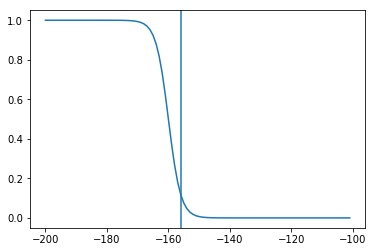

In [19]:
V=np.arange(-200,-100)
V0=-160
f=1/(1+np.exp(0.5*(V-V0)))
plt.plot(V,f)
plt.axvline(x=-156)

full_sims
Getting c
# 200 500
wall!


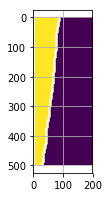

Getting c
# 200 500
Getting g
# 200 500
Getting gi
# 200 500
Getting Rg
# 200 500
Getting a
# 200 500
Getting r
# 200 500
Getting S
# 200 500
Getting nk
# 200 500
Getting Ek
# 200 500
Getting Ik
# 200 500
Getting v
# 200 500
Getting ht
# 200 500
Getting h
# 200 500
Getting tht
# 200 500
nrows 5


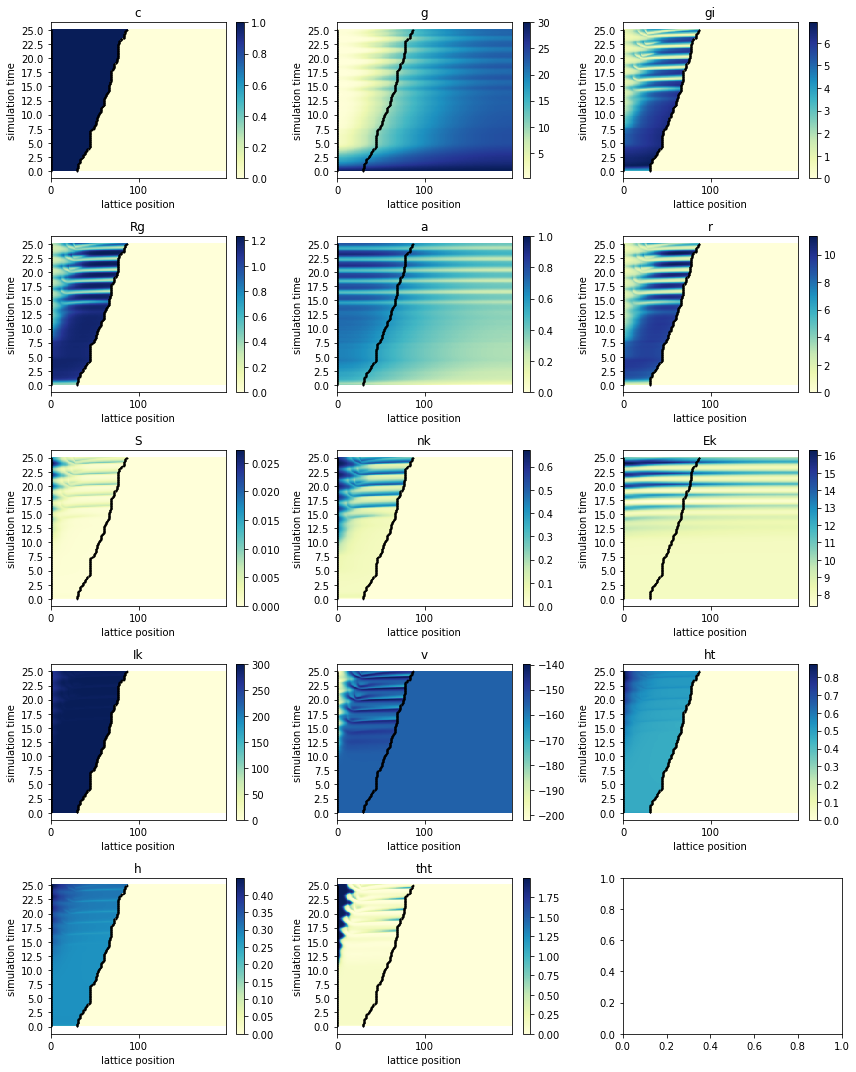

wsize is 200 wsize_h is 100


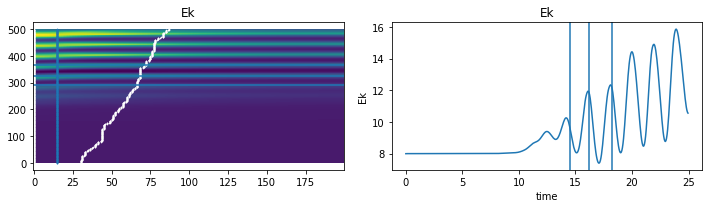

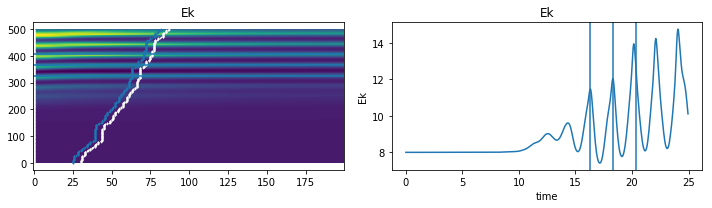

gr 200
gr 200


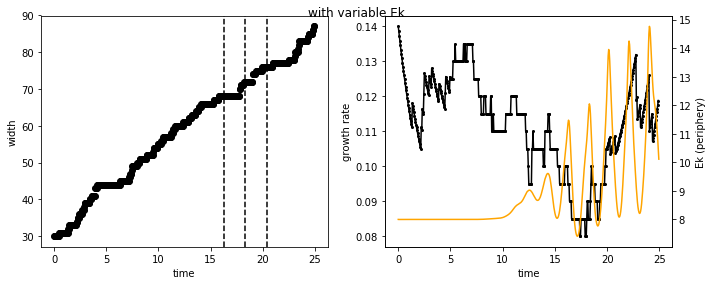

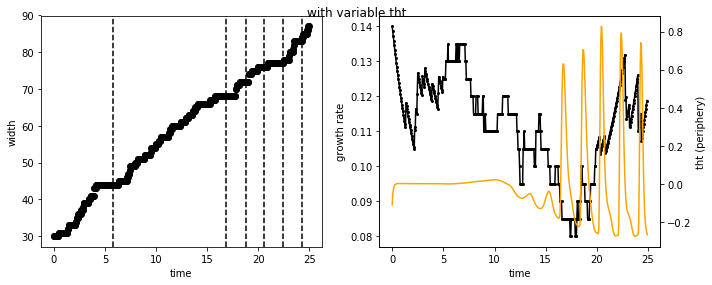

Getting c
# 200 500
Getting Ek
# 200 500
Getting tht
# 200 500


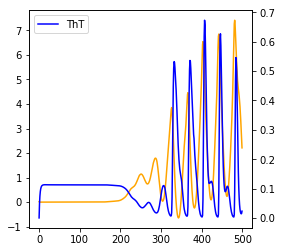

In [20]:
for GE in [30]:
    i=1
    Ls=200
    dx=1
    pars_setup={
        "Ls":Ls,
        "Radius":30,
        "center1":0,
        "center2":75,
         "Radius2":0,
        "sameinitial":1,
        "freeze":0,
        "unfreeze":0.1,
        "freeze2":50,
        "dx":dx,
        "st":0.05,
        "tt":25,
        "zero_tol":0.05,
        "dt":0.000005,
        "read_input":-1.0,
        "read_onlyc":-1.0,
        "tprint":50,
        "read_IE":-1,
        "read_Gi":-1,
        "seed_":i,
    }

    pars_fixed={
        "GE":GE,
        #"Vk":100,
        #"Vl" : 43, 
        "A_media":0,
        "K_media":8,
        #"V0":-150,
        #"Ikmax0":300,
        "Dlk": 0, 
    }
    pars_flow={
        "fl_Aext":5,
        "fl_Gext":5,
        "fl_Ekext":5,
        "stopflow1":50,
        "stopflow2":50,
        "tperturbG":50,
        "tperturbK":50,
        "dperturbK":1,
        "K_perturb":100,
        "GE_perturb":0.5,
        "A0":1,


    }
    
    factor=1.5
    pars_common=[('Dg',36000),('alpha_gt', 24*factor),('Kgt',0.75),('gv', 1), ("V0",-150),
                 ('g_tht', 0.3),('alpha_t', 20), ('gamma_t', 10),('V0_tht',-165),
                 ('gl', 18), ('gk', 70), ('dl', 4.),('Vk',100),('Vl',-156),
                 ('gamma_fl',0.085),('gamma_dif',0.085),('a_fl',0.012),('a_dif',0.012),
                 ('alpha_Rg',4.5), ('delta_Rg',24),('alpha_rRg',30),('Krg',5),('nrg',2),
                ('S0', 1.12),('gamma_s', 2.8),('GS0', 0.2),('ug', 2), ('Vad',0),
                 ('a0', 91), ('Sth', 0.03), ('b', 25*0.85), ('mk', 1),
                ('alpha_Rg',4.5*factor), ('delta_Rg',24*factor),('alpha_rRg',30*factor),('Krg',5),('nrg',2),
                ('gamma_fl',0.085),('gamma_dif',0.085),('a_fl',0.012),('a_dif',0.012),]
    
    pars_list=[ ('Pgrow', 0.3), ('F', 0.05),('Dp', 0.12), ('Ikmax0',300),('Dke',72000.0),
               ('delta_g', 0.35*factor),('g_dg',0.5),('Vth_dg',-150),#Gi
               ('alpha_a', 5*factor*0.6), ('delta_a', 0.1*factor*0.9), 
               ('beta_r', 5*2*factor), ('gamma_r',1*2*2*factor), 
               ('g_tht', 0.5),
               ('Gi0',3), ('std_ic',0.001),
              ('alpha_htg',0.075),('alpha_hta',0.0),('gamma_ht',0.01),('K_htA',0.1),('K_htG',1.5),('nht',2),        
             ('alpha_h',0.2*factor*2*5),('gamma_h',0.5*2*5),('K_hg',0.4),('n_hg',2),
             ('ht0',0.5),('h0',0.25),
             ]
    pars_to_explore=dict()
    for tuple_ in pars_list:
        key,val=tuple_
        pars_to_explore[key]=val
    for tuple_ in pars_common:
        key,val=tuple_
        pars_to_explore[key]=val

    pars=pars_to_explore.copy()
    pars.update(pars_setup)
    pars.update(pars_fixed)
    pars.update(pars_flow)
    pars['Da']=72000.0 #here A is unique so this is not doing anything. 
    
   

    infile="parset_full.txt"
    output_dir=os.path.join("full_sims")  
    outfile_name="out_name"
    varlist=["c","g","gi","Rg","a","r", "S", "nk", "Ek","Ik","v","ht", "h", "tht"]
    ic_dir='ic'
    ic_name='ic_n'
    toprintinputdir="ic_1"
    if not os.path.isdir(toprintinputdir):
        os.mkdir(toprintinputdir)
    toprintinputdir_name="ic_v1"
    
    if False:

        simulate(parlist_names_ordered, pars, infile, output_dir, outfile_name,ic_dir, ic_name, toprintinputdir, toprintinputdir_name)


    args={
    'outdir':output_dir,
    'basename':'out_name',
    'st':pars['st'],
    'varlist':varlist,
    'wsize_tht':200,
    'wsize_gr':200,
    'threshold_Ek':9,
    'color_gr1':'k',
    'color_gr2':'grey',
    'per_int':5, #change if the periphery line is desired at another distance
    'plotkym':True,
    'plotEk':True,
    'plotThT':False}
    print output_dir
    sys.stdout.flush()
    edges, peak_times_d=cmf2018.plot_all(**args)
    plt.show()
    rs=cmf2018.parse_results_intonumpy_dtype(output_dir=output_dir,basename='out_name',varlist=['c','Ek','tht'],dtype='d')
    stpoints=np.arange(len(rs[0]))
    Ek=rs[1][stpoints,edges[:,1]-20]
    ThT=rs[2][stpoints,edges[:,1]-20]
    fig,ax=plt.subplots(1,1,figsize=(4,4))
    ax.plot(Ek-8,label='Ek',color='orange')
    ax2=ax.twinx()
    ax2.plot(ThT,label='ThT',color='b')
    plt.legend()
    plt.show()
#

In [2]:
#cmap_ThT=mpl.colors.LinearSegmentedColormap.from_list('mycmap2',['#999999','#ffffff','#00ccff'])
cmap_ThT=mpl.colors.LinearSegmentedColormap.from_list('mycmap2',['#999999','#ffffff','#ccf2ff','#00ccff']) 
#im=plt.imshow(rs[2][::-1],cmap=cmap_ThT,aspect='auto')
#plt.colorbar(im)
#plt.show()

In [3]:
datadir='./'
#cmap_ThT=mpl.colors.LinearSegmentedColormap.from_list('mycmap2',['#eff9f9','#136ca0']) 
fontsize=14
mpl.rcParams['font.size']=fontsize
figsdir='../figs2/'

./full_sims
Getting c
# 200 500
wall!


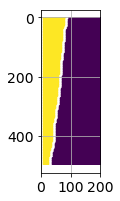

Getting c
# 200 500
Getting g
# 200 500
Getting gi
# 200 500
Getting Rg
# 200 500
Getting h
# 200 500
Getting a
# 200 500
Getting Ek
# 200 500
Getting tht
# 200 500
Getting v
# 200 500
nrows 3
wsize is 20.0 wsize_h is 10
gr 20.0


/Users/rosamartinezcorral/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


gr 20.0


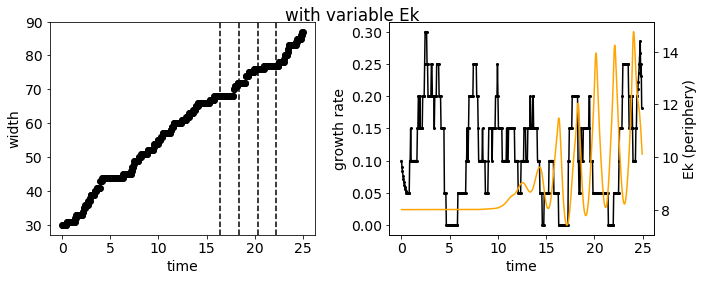

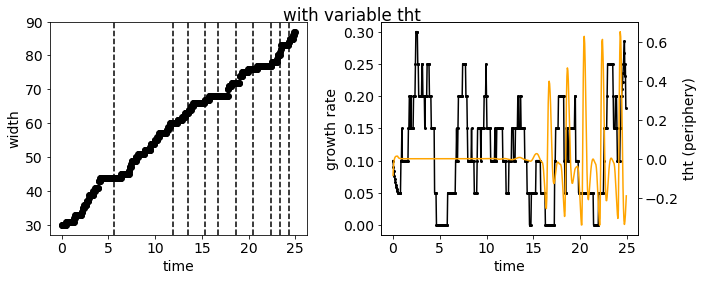

In [4]:
outdir='full_sims'

st=0.05
Ls=200
tt=25
output_dir=os.path.join(datadir,outdir)
args={
    'outdir':output_dir,
    'basename':'out_name',
    'st':st,
    'varlist':['c','g','gi','Rg','h','a','Ek','tht','v'],
    'wsize_tht':1/st,
    'wsize_gr':1/st,
    'threshold_Ek':10.5,
    'color_gr1':'k',
    'color_gr2':'grey',
    'per_int':5, #change if the periphery line is desired at another distance
    'plotkym':False,
    'plotEk':False,
    'plotThT':False}
print output_dir
sys.stdout.flush()
edges, peak_times_d=cmf2018.plot_all(**args)
#plt.show()


In [5]:
varlist=['c','Ek','tht','g','h','a','s']
colormaps=[plt.cm.Oranges,cmap_ThT,plt.cm.Greys,plt.cm.Greys,plt.cm.Greys,plt.cm.Greys,plt.cm.Greys,plt.cm.Greys]
rs=cmf2018.parse_results_intonumpy_dtype(output_dir=output_dir,basename='out_name',varlist=varlist,dtype='d')
stpoints=np.arange(len(rs[0]))

Getting c
# 200 500
Getting Ek
# 200 500
Getting tht
# 200 500
Getting g
# 200 500
Getting h
# 200 500
Getting a
# 200 500
Getting s
# 200 500


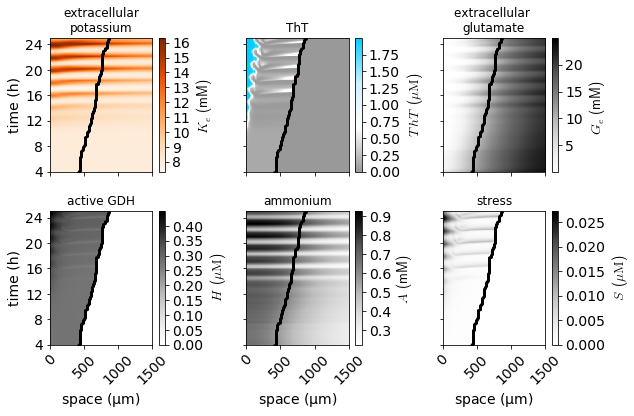

In [6]:
xticks=np.arange(0,Ls+1,50)
xticklab=['%d'%x for x in xticks*10] #in um
yticklab=np.arange(0,tt+2,4)
yticks=yticklab/st
yticklab=['%d'%x for x in yticklab]
titles=varlist
titles=['extracellular\npotassium','ThT','extracellular \nglutamate', 'active GDH','ammonium','stress']
titles2=['$K_e$ (mM)','$ThT$ ($\mathrm{\mu M}$)','$G_e$ (mM)','$H$ ($\mathrm{\mu M}$)','$A$ (mM)','$S$ ($\mathrm{\mu M}$)']
fig,axes=plt.subplots(2,3,figsize=(9,6))
#fig.suptitle(outdir,y=1.05)

#ax=axes[0][1]
#kym=rs[1]
#im=ax.imshow(kym,aspect='auto',cmap=plt.cm.Oranges,origin='lower')
#plt.colorbar(im,ax=ax,label=r'$\mathrm{K_e}$')
#ax.set_title(titles[0])
#ax=axes[0][2]
#kym=rs[2]
#ax.set_title(titles[1])
#im=ax.imshow(kym,aspect='auto',cmap=cmap_ThT,origin='lower')
#plt.colorbar(im,ax=ax,label='ThT')

for i in range(len(varlist)-1):
    ax=axes[i//3][i%3]
    kym=rs[i+1]
    kym_=kym[int(4/st):]
    im=ax.imshow(kym,aspect='auto',cmap=colormaps[i],vmin=kym_.min(),vmax=kym_.max(),origin='lower')
    cb=plt.colorbar(im,ax=ax)
    cb.set_label('%s'%titles2[i],useTex=True,fontsize=fontsize)
    ax.set_title(titles[i],fontsize=fontsize-2)
for rnum,row in enumerate(axes):
    for anum,ax in enumerate(row):
        ax.scatter(edges[:,1],np.arange(len(edges[:,1])),color='k',s=2)
        ax.set_xticks(xticks)
        if rnum==1:
            ax.set_xticklabels(xticklab,rotation=45)
            ax.set_xlabel(r'space ($\mathrm{\mu m}$)')
        else:
            ax.set_xticklabels([])
        ax.set_yticks(yticks)
        if anum==0:
            ax.set_yticklabels(yticklab)
            ax.set_ylabel('time (h)')
        else:
            ax.set_yticklabels([])
        ax.set_ylim([4/st,25/st]) #yticks[-1]])
        ax.set_xlim(0,150)

plt.tight_layout()
#fig.text(0,1,'B',fontsize=16)
plt.savefig(os.path.join(figsdir,'kyms_full.pdf'),bbox_inches='tight')
plt.show()
#Ek=rs[1][stpoints,edges[:,1]]
#ThT=rs[2][stpoints,edges[:,1]]
#plt.plot(Ek-8,label='Ek')
#plt.plot(ThT,label='ThT')
#plt.legend()
#    plt.show()
    
   